# EXPLORATORY DATA ANALYSIS 


In [127]:
# Import required Libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [128]:
# Read in CSV files 

# Skaters
skaters = pd.read_csv('cleanData/allSkaters.csv')
fiveOnfive = pd.read_csv('cleanData/fiveOnFive.csv')

defence5on5 = pd.read_csv('cleanData/defence5on5.csv')
forward5on5 = pd.read_csv('cleanData/forwards5on5.csv')

# Lines/Pairings
forwardLines = pd.read_csv('cleanData/forwardLines.csv')
dPairings = pd.read_csv('cleanData/defensivePairings.csv')

# teams
teamLevel = pd.read_csv('cleanData/teamLevel.csv')

skaters = skaters.drop(columns={'Unnamed: 0'})
fiveOnfive = fiveOnfive.drop(columns={'Unnamed: 0'})
defence5on5 = defence5on5.drop(columns={'Unnamed: 0'})
forward5on5 = forward5on5.drop(columns={'Unnamed: 0'})
forwardLines = forwardLines.drop(columns={'Unnamed: 0'})
dPairings = dPairings.drop(columns={'Unnamed: 0'})
teamLevel = teamLevel.drop(columns={'Unnamed: 0'})


In [129]:
# Summary Statistics 

skaters.describe()

,playerId,season,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,offIce_xGoalsPercentage,onIce_corsiPercentage,offIce_corsiPercentage,...,xGoalsForAfterShifts,xGoalsAgainstAfterShifts,corsiForAfterShifts,corsiAgainstAfterShifts,fenwickForAfterShifts,fenwickAgainstAfterShifts,weight,primaryNumber,height,1stSeason
count,2.341500e+04,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,...,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,23415.000000,22740.000000,22740.000000,23415.000000,22915.000000
mean,8.477979e+06,2021.026052,45.330771,17955.150972,378.732906,17.619120,0.430055,0.467467,0.436693,0.466529,...,0.351896,0.156928,7.456716,3.493829,5.858808,2.817083,196.588391,40.392260,185.492138,2015.710233
std,2.848323e+03,1.394386,27.439446,26479.152442,551.262182,22.141242,0.289432,0.260342,0.279443,0.254906,...,1.025085,0.412670,21.144909,8.752046,16.607873,7.073875,15.680648,26.180607,5.432541,4.454467
min,8.465009e+06,2019.000000,1.000000,0.000000,0.000000,-9.950000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,140.000000,2.000000,162.560000,1997.000000
25%,8.476391e+06,2020.000000,18.000000,410.000000,13.000000,0.980000,0.160000,0.320000,0.190000,0.330000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,185.000000,18.000000,182.880000,2013.000000
50%,8.478042e+06,2021.000000,51.000000,3854.000000,78.000000,8.480000,0.470000,0.490000,0.470000,0.490000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.000000,37.000000,185.420000,2016.000000
75%,8.480027e+06,2022.000000,70.000000,28359.000000,641.000000,27.480000,0.580000,0.570000,0.580000,0.560000,...,0.100000,0.040000,2.000000,1.000000,2.000000,1.000000,208.000000,59.000000,187.960000,2019.000000
max,8.484911e+06,2023.000000,85.000000,128642.000000,2614.000000,154.730000,1.000000,1.000000,1.000000,1.000000,...,11.640000,4.180000,232.000000,81.000000,174.000000,65.000000,255.000000,98.000000,205.740000,2023.000000


In [130]:
skaters

,playerId,season,name,team,situation,games_played,icetime,shifts,gameScore,onIce_xGoalsPercentage,...,shootsCatches,primaryNumber,position,height,BirthCity,S/P,DraftYr,Round,Overall,1stSeason
0,8475169,2019,Evander Kane,SJS,other,64,3559.0,55.0,41.11,0.50,...,L,9.0,L,187.96,Vancouver,BC,2009,1,4,2009.0
1,8475169,2019,Evander Kane,SJS,all,64,74903.0,1518.0,46.28,0.55,...,L,9.0,L,187.96,Vancouver,BC,2009,1,4,2009.0
2,8475169,2019,Evander Kane,SJS,5on5,64,56312.0,1195.0,46.28,0.48,...,L,9.0,L,187.96,Vancouver,BC,2009,1,4,2009.0
3,8475169,2019,Evander Kane,SJS,4on5,64,5124.0,137.0,40.77,0.17,...,L,9.0,L,187.96,Vancouver,BC,2009,1,4,2009.0
4,8475169,2019,Evander Kane,SJS,5on4,64,9908.0,131.0,45.09,0.88,...,L,9.0,L,187.96,Vancouver,BC,2009,1,4,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23410,8477488,2023,Brett Pesce,CAR,other,70,2731.0,48.0,30.97,0.61,...,R,22.0,D,190.50,Tarrytown,NY,2013,3,66,2015.0
23411,8477488,2023,Brett Pesce,CAR,all,70,85212.0,1725.0,41.27,0.50,...,R,22.0,D,190.50,Tarrytown,NY,2013,3,66,2015.0
23412,8477488,2023,Brett Pesce,CAR,5on5,70,72590.0,1415.0,41.27,0.54,...,R,22.0,D,190.50,Tarrytown,NY,2013,3,66,2015.0
23413,8477488,2023,Brett Pesce,CAR,4on5,70,9349.0,217.0,40.17,0.17,...,R,22.0,D,190.50,Tarrytown,NY,2013,3,66,2015.0


In [131]:
forwardLines.describe()

,season,games_played,icetime,iceTimeRank,xGoalsPercentage,corsiPercentage,fenwickPercentage,xOnGoalFor,xGoalsFor,xReboundsFor,...,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst
count,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,...,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000,9373.000000
mean,2021.097834,11.630108,2851.308332,95.759842,0.491871,0.495582,0.494503,24.525283,2.062931,1.628601,...,44.217523,32.727088,32.792136,4.356663,0.321748,0.404639,0.405129,1.877899,1.884329,1.852120
std,1.395044,9.814512,4183.315641,85.988503,0.159228,0.108619,0.116777,39.304595,3.452310,2.646648,...,63.294653,47.241097,47.195651,7.206919,0.466212,0.695153,0.695050,2.739145,2.744460,2.695895
min,2019.000000,1.000000,600.000000,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,...,1.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,5.000000,900.000000,31.000000,0.390000,0.430000,0.420000,7.150000,0.530000,0.460000,...,14.680000,11.000000,10.760000,1.000000,0.100000,0.000000,0.000000,0.590000,0.590000,0.580000
50%,2021.000000,9.000000,1486.000000,71.000000,0.500000,0.500000,0.500000,12.370000,1.020000,0.820000,...,23.730000,18.000000,17.800000,2.000000,0.170000,0.190000,0.190000,1.020000,1.020000,1.000000
75%,2022.000000,15.000000,2908.000000,136.000000,0.590000,0.560000,0.570000,24.690000,2.090000,1.640000,...,45.360000,33.000000,33.470000,5.000000,0.330000,0.510000,0.510000,1.940000,1.950000,1.920000
max,2023.000000,82.000000,57915.000000,768.000000,1.000000,0.940000,1.000000,587.450000,54.060000,40.810000,...,784.890000,603.000000,596.110000,125.000000,5.550000,9.750000,9.750000,32.860000,32.580000,32.130000


In [132]:
countries = fiveOnfive[['name', 'team', 'nationality', 'BirthCity', 'S/P']]

countries_reduced = countries.groupby('name').agg({
    'team': 'first',        # Or 'max', 'min', etc.
    'nationality': 'first', # Or 'max', 'min', etc.
    'BirthCity': 'first',   # Or 'max', 'min', etc.
    'S/P': 'first'          # Or 'max', 'min', etc.
}).reset_index()

# Display the reduced DataFrame
countries_reduced


,name,team,nationality,BirthCity,S/P
0,A.J. Greer,BOS,CAN,Joliette,QC
1,Aaron Ekblad,FLA,CAN,Windsor,ON
2,Aaron Ness,ARI,USA,Roseau,MN
3,Aatu Raty,VAN,FIN,Oulu,--
4,Adam Beckman,MIN,CAN,Saskatoon,SK
...,...,...,...,...,...
1444,Zack MacEwen,LAK,CAN,Charlottetown,PE
1445,Zack Ostapchuk,OTT,None,St. Albert,AB
1446,Zack Smith,CHI,CAN,Maple Creek,SK
1447,Zdeno Chara,BOS,SVK,Trencin,--


In [139]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import folium

# Assuming 'countries_reduced' is your DataFrame with 'name', 'team', 'nationality', 'BirthCity', 'S/P'
# Step 1: Handle missing data
countries_reduced['location'] = countries_reduced['BirthCity'].fillna('') + ', ' + countries_reduced['S/P'].fillna('')
countries_reduced

# Step 2: Geocode Birthplaces
geolocator = Nominatim(user_agent="geoapiExercises")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
countries_reduced['coordinates'] = countries_reduced['location'].apply(geocode)
countries_reduced['latitude'] = countries_reduced['coordinates'].apply(lambda x: x.latitude if x else None)
countries_reduced['longitude'] = countries_reduced['coordinates'].apply(lambda x: x.longitude if x else None)

countries_reduced
# # Step 3: Plotting the map using geopandas
# gdf = gpd.GeoDataFrame(
#     countries_reduced, 
#     geometry=gpd.points_from_xy(countries_reduced['longitude'], countries_reduced['latitude'])
# )

# # Assigning a color to each team
# teams = countries_reduced['team'].unique()
# colors = plt.cm.get_cmap('tab20', len(teams))  # Use a colormap with enough colors

# # Plot the map
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# for i, team in enumerate(teams):
#     team_data = gdf[gdf['team'] == team]
#     team_data.plot(ax=ax, color=colors(i), label=team, markersize=50)

# ax.set_title('NHL Players Birthplaces by Team')
# ax.legend(loc='lower left', fontsize='small', title="Teams")
# plt.show()

KeyboardInterrupt: 

In [134]:
lineMetrics = [
    'lineId', 
    'season',
    'name',
    'team',
    'games_played',
    'icetime',
    'xGoalsPercentage',
    'corsiPercentage',
    'fenwickPercentage',
    'xGoalsFor',
    'xGoalsAgainst',
    'shotsOnGoalFor',
    'shotsOnGoalAgainst',
    'goalsFor',
    'goalsAgainst',
    'penaltiesFor',
    'penaltiesAgainst',
    'faceOffsWonFor',
    'hitsFor']


skaterMetrics = [
    'playerId',
    'season',
    'name',
    'team',
    'position',
    'nationality',
    'primaryNumber',
    'games_played',
    'birthDate',
    'height',
    'weight',
    'shootsCatches',
    'situation',
    
    # OnIce Metrics - Team metric for when the player is on the ice
    'onIce_xGoalsPercentage',
    'OnIce_F_xGoals',
    'OnIce_A_xGoals',
    'OnIce_F_goals',
    'OnIce_A_goals',
    'onIce_corsiPercentage',
    'onIce_fenwickPercentage',
    
    # Individual Metrics
    'I_F_xGoals',
    'I_F_primaryAssists',
    'I_F_secondaryAssists',
    'I_F_shotsOnGoal',
    'I_F_goals',
    'I_F_points',
    'I_F_hits',
    'I_F_shifts',
    'I_F_giveaways',
    'I_F_takeaways',
    'I_F_penalityMinutes',
    'penalties',
    'penalityMinutes',
    'penalityMinutesDrawn',
    'penaltiesDrawn',
    'faceoffsWon',
    'faceoffsLost',
    
    # corsi-fenwick
    'corsiForAfterShifts',
    'corsiAgainstAfterShifts',
    'fenwickForAfterShifts',
    'fenwickAgainstAfterShifts'
]

In [135]:
skaters = skaters[skaterMetrics]
skaterStats = skaters.drop(columns=['games_played', 'height', 'weight', 'playerId', 'name', 'team', 'position', 'nationality', 'primaryNumber', 'birthDate', 'shootsCatches', 'situation', 'season'])
skaterStats.columns = skaterStats.columns.str.replace('I_F_', '')
forwardLines = forwardLines[lineMetrics]
forwardLineStats = forwardLines.drop(columns=['lineId', 'name', 'team', 'season'])
forwardLineStats.columns = forwardLineStats.columns.str.replace('I_F_', '')
dPairings = dPairings[lineMetrics]
dPairingStats = dPairings.drop(columns=['lineId', 'name', 'team', 'season'])
dPairingStats.columns = dPairingStats.columns.str.replace('I_F_', '')
defence5on5 = defence5on5[skaterMetrics]
defencemanStats = defence5on5.drop(columns=['games_played', 'height', 'weight','playerId', 'name', 'team', 'position', 'nationality', 'primaryNumber', 'birthDate', 'shootsCatches', 'situation', 'season'])
defencemanStats.columns = defencemanStats.columns.str.replace('I_F_', '')
forward5on5 = forward5on5[skaterMetrics]
forwardsStats = forward5on5.drop(columns=['games_played', 'height', 'weight','playerId', 'name', 'team', 'position', 'nationality', 'primaryNumber', 'birthDate', 'shootsCatches', 'situation', 'season'])
forwardsStats.columns = forwardsStats.columns.str.replace('I_F_', '')

forward5on5.columns = forward5on5.columns.str.replace('I_F_', '')
forwardLines.columns = forwardLines.columns.str.replace('I_F_', '')
dPairings.columns = dPairings.columns.str.replace('I_F_', '')
defence5on5.columns = defence5on5.columns.str.replace('I_F_', '')
skaters.columns = skaters.columns.str.replace('I_F_', '')


### Correlations

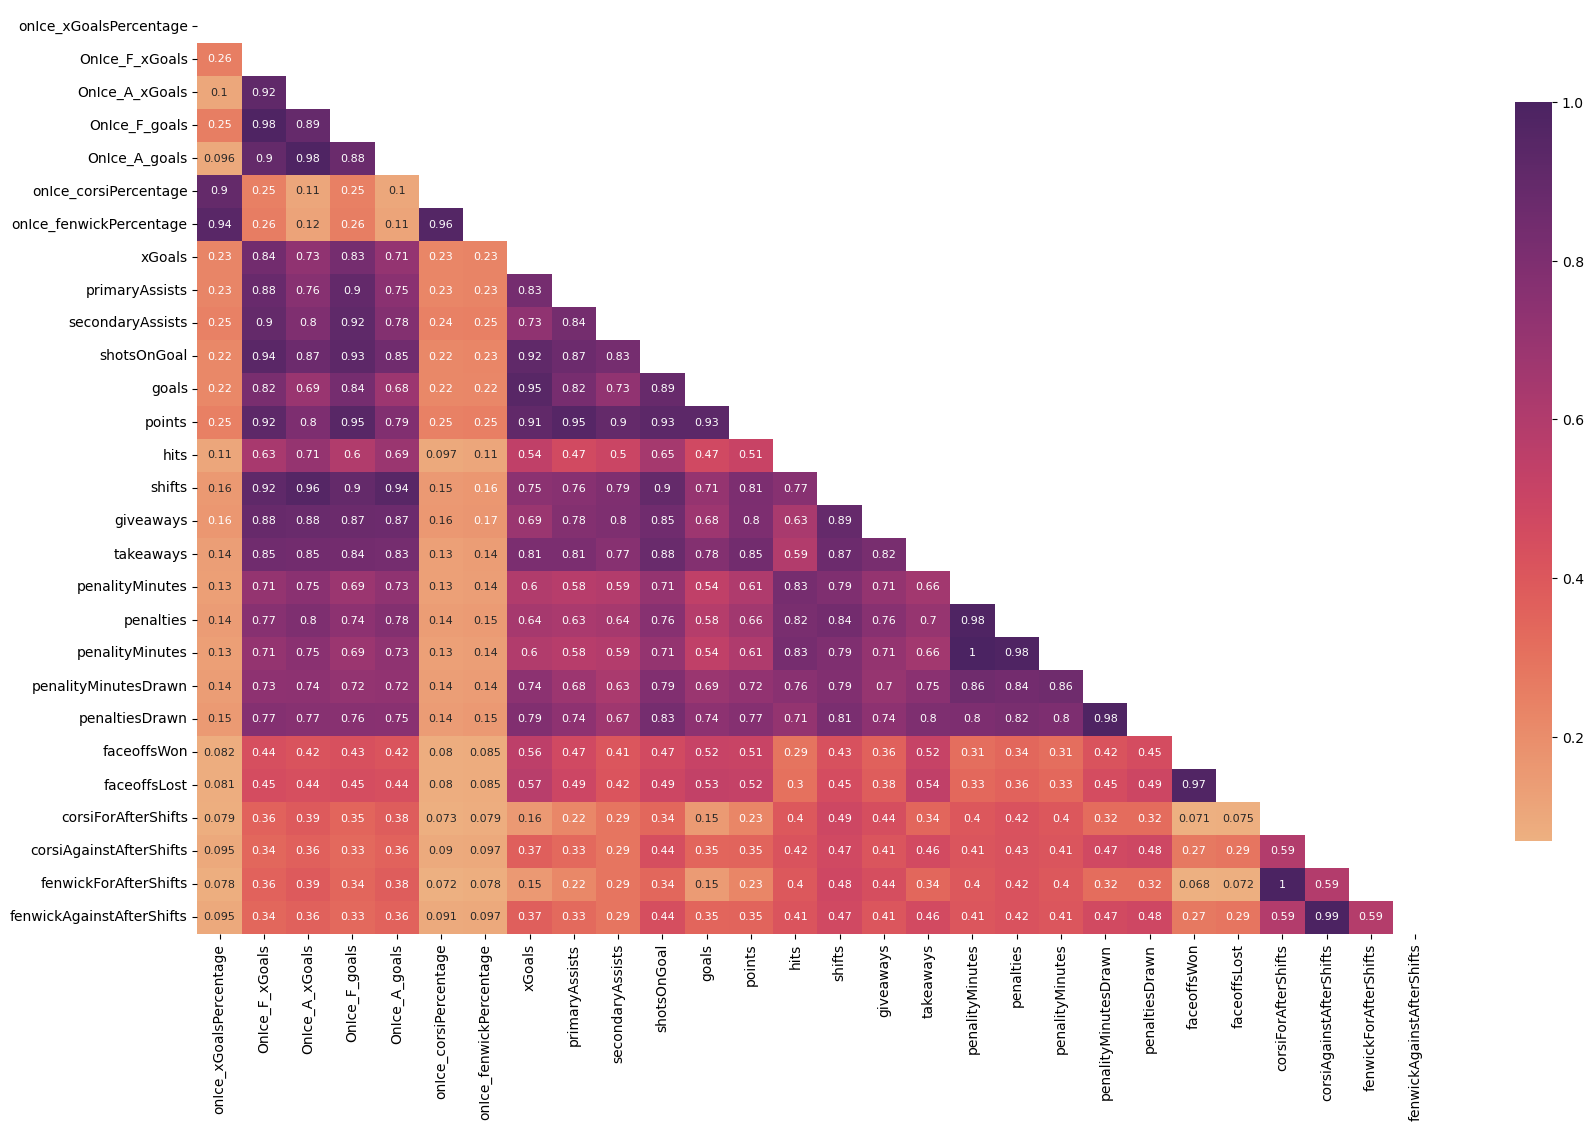

In [136]:
corr_matrix = skaterStats.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='flare', annot_kws={"size": 8}, cbar_kws={'shrink': .8})

plt.show()

In [137]:
target_corr = corr_matrix['xGoals'].sort_values(ascending=False)
print(target_corr)

xGoals                       1.000000
goals                        0.946472
shotsOnGoal                  0.915204
points                       0.910675
OnIce_F_xGoals               0.843935
OnIce_F_goals                0.833093
primaryAssists               0.829712
takeaways                    0.810483
penaltiesDrawn               0.788378
shifts                       0.748530
penalityMinutesDrawn         0.742360
secondaryAssists             0.728859
OnIce_A_xGoals               0.728255
OnIce_A_goals                0.714898
giveaways                    0.687865
penalties                    0.640294
penalityMinutes              0.602195
penalityMinutes              0.602195
faceoffsLost                 0.571357
faceoffsWon                  0.555294
hits                         0.544424
corsiAgainstAfterShifts      0.371686
fenwickAgainstAfterShifts    0.370974
onIce_fenwickPercentage      0.234414
onIce_xGoalsPercentage       0.230892
onIce_corsiPercentage        0.227518
corsiForAfte